<a href="https://colab.research.google.com/github/maurinhopa/mvp-puc-heart-failure/blob/main/MVP_Heart_Failure_Mauro_ACN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MVP - PUC RIO - 06.07.2025

Sprint: Análise de Dados e Boas Práticas

Mauro Athayde Campos Nascimento

# Predição de Mortalidade em Pacientes com Insuficiência Cardíaca

Este trabalho tem como objetivo aplicar os conceitos de análise exploratória e pré-processamento de dados, com base em um dataset real de pacientes com insuficiência cardíaca.

A base foi escolhida por conter um tema relevante e crítico: a previsão de mortalidade hospitalar. Compacta e de fácil manuseio e com variáveis clínicas objetivas, o estudo está baseado em um artigo científico publicado em 2020 (*Chicco & Jurman*), que demonstra que é possível prever a mortalidade de pacientes com base em apenas duas variáveis clínicas: **fração de ejeção** e **creatinina sérica**.

Vamos explorar essa base com olhar analítico, passando pelas etapas de entendimento do problema, análise estatística, visualização e preparação dos dados, conforme proposto no escopo da disciplina.



## Definição do problema

**Problema:**  
Queremos prever se um paciente com insuficiência cardíaca irá sobreviver ou falecer durante o período de acompanhamento hospitalar, com base em informações clínicas e laboratoriais simples.

**Tipo de problema:**  
Do tipo Aprendizado Supervisionado (classificação binária), com variável-alvo sendo `DEATH_EVENT` (0 = sobreviveu, 1 = faleceu).

**Premissas iniciais:**  
- A mortalidade está fortemente associada a marcadores como **fração de ejeção** e **creatinina sérica**, conforme validado no artigo original.  
- Outras variáveis clínicas (como idade, plaquetas, hipertensão, etc.) podem ter influência complementar, mas espera-se que **as duas variáveis principais concentrem a maior parte do poder preditivo**.

**Condições para uso da base:**  
- A base foi selecionada por estar disponível publicamente (UCI Machine Learning Repository) e por ter sido utilizada em estudo científico recente e bem estruturado (Chicco & Jurman, 2020).
- Possui apenas **299 registros e 13 atributos**, o que favorece a manipulação didática, sem comprometer a profundidade da análise.
- Os dados foram coletados entre abril e dezembro de 2015, em dois hospitais do Paquistão, e representam pacientes com insuficiência cardíaca em estágio avançado.


**Variável-alvo (target):**  
- `DEATH_EVENT` (0 = sobreviveu, 1 = faleceu)

A seguir, apresentamos o dicionário de variáveis da base.


## Dicionário das variáveis (com significados)

A base de dados possui 13 variáveis (atributos), listadas abaixo com seus significados, tipos e unidades:

| Nome da variável | Tipo | Significado |
|------------------|------|-------------|
| `age` | Numérica | Idade do paciente (em anos) |
| `anaemia` | Binária | 0 = sem anemia, 1 = com anemia |
| `creatinine_phosphokinase` | Numérica | Nível da enzima CPK (mcg/L) |
| `diabetes` | Binária | 0 = não diabético, 1 = diabético |
| `ejection_fraction` | Numérica | Fração de ejeção do coração (%) |
| `high_blood_pressure` | Binária | 0 = sem hipertensão, 1 = com hipertensão |
| `platelets` | Numérica | Contagem de plaquetas (milhares/mL) |
| `serum_creatinine` | Numérica | Creatinina sérica (mg/dL) |
| `serum_sodium` | Numérica | Sódio sérico (mEq/L) |
| `sex` | Binária | 0 = mulher, 1 = homem |
| `smoking` | Binária | 0 = não fumante, 1 = fumante |
| `time` | Numérica | Tempo de acompanhamento (em dias) |
| `DEATH_EVENT` | Binária | 0 = sobreviveu, 1 = faleceu |


### Estatísticas descritivas

Nesta etapa buscamos entender a estrutura da base e possíveis problemas de integridade. Abaixo, seguem considerações importantes descobertas através de análise sobre a base de dados em questão:

1. **Quantos atributos e instâncias existem?**  
A base possui 13 atributos (colunas) e 299 instâncias (linhas), representando pacientes com insuficiência cardíaca.

2. **Quais são os tipos de dados dos atributos?**  
Todos os atributos do dataset são numéricos, sendo representados como `int64` (inteiros) ou `float64` (decimais). A base não contém variáveis categóricas explícitas ou atributos de texto. Algumas variáveis são binárias (0 ou 1), indicando presença ou ausência de condição clínica.

3. **Verifique as primeiras linhas do dataset. Algo chama a atenção?**  
As primeiras linhas mostram dados organizados, ainda que posteriormente tenha sido identificada uma anomalia na variável `age`, com valores de 60667 anos, o que claramente indica erro.

4. **Há valores faltantes, discrepantes ou inconsistentes?**  
Não há valores faltantes, mas encontramos **dois valores discrepantes em `age`**, provavelmente causados por erro de exportação. Esses casos foram tratados a parte, e documentados na sequência.

5. **Resumo estatístico dos atributos numéricos — o que você percebe?**  
Antes da correção, a média da idade estava absurdamente alta (~466 anos) por causa dos valores corrompidos. Após substituição por média válida, os dados passaram a refletir a realidade, conforme novo resumo estatístico impresso. Também foi observado grande amplitude em variáveis como `creatinine_phosphokinase` e `platelets`, o que pode indicar necessidade futura de normalização ou transformação. O resumo estatístico se prova especialmente importante neste momento de análise prévio dos dados, ajudando a identificar anomalias com o intuito de garantir a integridade da base.

In [6]:
# Carrega a base original
url = 'https://raw.githubusercontent.com/maurinhopa/mvp-puc-heart-failure/main/Tratado_heart_failure_clinical_records_dataset.csv'
df = pd.read_csv(url, sep=';')

# Configura a exibição para 2 casas decimais
pd.options.display.float_format = '{:.2f}'.format

In [7]:
import pandas as pd

# 1. Número de instâncias e atributos
print("\033[1m# 1. Número de instâncias e atributos\033[0m")
print(f'Número de instâncias: {df.shape[0]}')
print(f'Número de atributos: {df.shape[1]}')

# 2. Tipos de dados
print("\n\033[1m# 2. Tipos de dados\033[0m")
print("\nTipos de dados por coluna:")
print(df.dtypes)

# 3. Primeiras linhas
print("\n\033[1m# 3. Primeiras linhas\033[0m")
print("\nPrimeiras 5 linhas:")
display(df.head())

# 4. Verificação de valores ausentes
print("\n\033[1m# 4. Verificação de valores ausentes\033[0m")
print("\nValores ausentes por coluna:")
print(df.isnull().sum())

# 5.1 Resumo estatístico básico
print("\n\033[1m# 5.1 Resumo estatístico básico\033[0m")
print("\nResumo estatístico:")
display(df.describe())

# 5.2 Mediana dos atributos numéricos
print("\n\033[1m# 5.2 Mediana dos atributos numéricos\033[0m")
print("\nMediana dos atributos:")
mediana = df.median(numeric_only=True).to_frame(name='Mediana')
display(mediana)

# 5.3 Moda dos atributos
print("\n\033[1m# 5.3 Moda dos atributos\033[0m")
print("\nModa dos atributos:")
moda = df.mode().iloc[[0]].T.rename(columns={0: 'Moda'})
display(moda)



# 1. Número de instâncias e atributos
Número de instâncias: 299
Número de atributos: 13

# 2. Tipos de dados

Tipos de dados por coluna:
age                           int64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

# 3. Primeiras linhas

Primeiras 5 linhas:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.70,116,0,0,8,1



# 4. Verificação de valores ausentes

Valores ausentes por coluna:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# 5.1 Resumo estatístico básico

Resumo estatístico:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00,299.00
mean,466.23,0.43,581.84,0.42,38.08,0.35,263358.03,1.39,136.63,0.65,0.32,130.26,0.32
std,4948.43,0.50,970.29,0.49,11.83,0.48,97804.24,1.03,4.41,0.48,0.47,77.61,0.47
min,40.00,0.00,23.00,0.00,14.00,0.00,25100.00,0.50,113.00,0.00,0.00,4.00,0.00
25%,51.00,0.00,116.50,0.00,30.00,0.00,212500.00,0.90,134.00,0.00,0.00,73.00,0.00
50%,60.00,0.00,250.00,0.00,38.00,0.00,262000.00,1.10,137.00,1.00,0.00,115.00,0.00
75%,70.00,1.00,582.00,1.00,45.00,1.00,303500.00,1.40,140.00,1.00,1.00,203.00,1.00
max,60667.00,1.00,7861.00,1.00,80.00,1.00,850000.00,9.40,148.00,1.00,1.00,285.00,1.00



# 5.2 Mediana dos atributos numéricos

Mediana dos atributos:


,Mediana
age,60.00
anaemia,0.00
creatinine_phosphokinase,250.00
diabetes,0.00
ejection_fraction,38.00
high_blood_pressure,0.00
platelets,262000.00
serum_creatinine,1.10
serum_sodium,137.00
sex,1.00



# 5.3 Moda dos atributos

Moda dos atributos:


,Moda
age,60.00
anaemia,0.00
creatinine_phosphokinase,582.00
diabetes,0.00
ejection_fraction,35.00
high_blood_pressure,0.00
platelets,263358.03
serum_creatinine,1.00
serum_sodium,136.00
sex,1.00


## Continuação da análise descritiva
## Detecção de valor atípico - Variável **AGE**
Ao inspecionar os dados estatísticos, foi identificado um valor máximo anormal na variável age, com o registro de 60.667 anos, o que é incompatível com a natureza da variável, originado de possível erro de digitação ou exportação do arquivo.

Como o restante das colunas dessa linha aparenta estar consistente, optamos por corrigir o valor, e não remover o registro por completo, para preservar os dados originais e evitar perda de informação em uma base onde cada instância é relevante.

Optamos por uma abordagem mais refinada: em vez de excluir os registros ou imputar com a média geral, **substituímos os valores com base na mediana de idade de pacientes com perfil clínico semelhante** (considerando sexo, tabagismo, diabetes e desfecho). Essa técnica, apesar de simples, respeita o contexto dos dados e evita distorções estatísticas.

Ao de aplicar a substituição inteligente, registramos abaixo os valores antes e depois da correção:

| Índice | Valor original (`age`) | Valor corrigido (mediana do grupo) |
|--------|-------------------------|-------------------------------------|
| 185     | 60667                  | 65                                  |
| 188     | 60667                  | 60                                  |

A correção acima descrita foi feita individualmente para cada linha afetada, conforme códigos a seguir:


In [8]:
# Verifica os registros usados como base para a interpolação de cada índice com erro
for idx in [186, 213]:
    perfil = df.loc[idx]
    filtro = (
        (df['sex'] == perfil['sex']) &
        (df['diabetes'] == perfil['diabetes']) &
        (df['smoking'] == perfil['smoking']) &
        (df['DEATH_EVENT'] == perfil['DEATH_EVENT']) &
        (df['age'] < 120)
    )

    grupo = df.loc[filtro]

    print(f"\nBase usada para interpolar índice {idx}: {len(grupo)} instâncias")
    display(grupo[['age', 'sex', 'diabetes', 'smoking', 'DEATH_EVENT']])

    # Substituições manuais (método já validado com base na mediana do grupo)
df.loc[185, 'age'] = 65
df.loc[188, 'age'] = 60




Base usada para interpolar índice 186: 13 instâncias


,age,sex,diabetes,smoking,DEATH_EVENT
8,65,0,0,0,1
18,70,0,0,0,1
26,95,0,0,0,1
49,57,0,0,0,1
51,53,0,0,0,1
61,50,0,0,0,1
68,70,0,0,0,1
113,70,0,0,0,1
119,86,0,0,0,1
150,72,0,0,0,1



Base usada para interpolar índice 213: 18 instâncias


,age,sex,diabetes,smoking,DEATH_EVENT
4,65,0,1,0,1
19,48,0,1,0,1
21,65,0,1,0,1
24,75,0,1,0,1
32,50,0,1,0,1
37,82,0,1,0,1
39,60,0,1,0,1
44,60,0,1,0,1
52,60,0,1,0,1
53,70,0,1,0,1


In [9]:
# Índices com erro conhecido
indices_com_erro = [185, 188]

# Lista para armazenar os resultados
resultados = []

# Loop para exibir as substituições
for idx in indices_com_erro:
    perfil = df.loc[idx]

    filtro = (
        (df['sex'] == perfil['sex']) &
        (df['diabetes'] == perfil['diabetes']) &
        (df['smoking'] == perfil['smoking']) &
        (df['DEATH_EVENT'] == perfil['DEATH_EVENT']) &
        (df['age'] < 120)
    )

    idade_corrigida = df.loc[filtro, 'age'].median()

    resultados.append({
        'Índice': idx,
        'Valor original': 60667,
        'Valor corrigido': int(idade_corrigida)
    })

# Mostrar resultados
import pandas as pd
display(pd.DataFrame(resultados))


,Índice,Valor original,Valor corrigido
0,185,60667,65
1,188,60667,58


In [10]:
mensagens = []



# Define os índices com erro
indices_com_erro = [185, 188]

for idx in indices_com_erro:
    perfil = df.loc[idx]
    filtro = (
        (df['sex'] == perfil['sex']) &
        (df['diabetes'] == perfil['diabetes']) &
        (df['smoking'] == perfil['smoking']) &
        (df['DEATH_EVENT'] == perfil['DEATH_EVENT']) &
        (df['age'] < 120)
    )

    idade_corrigida = df.loc[filtro, 'age'].median()

    mensagens.append(f"→ Índice {idx} | Valor original: 60667 | Valor corrigido: {int(idade_corrigida)}")

    df.at[idx, 'age'] = idade_corrigida


# Exibe o novo resumo estatístico da variável corrigida
print("\nResumo da variável 'age' após correções:")
display(df['age'].describe())









Resumo da variável 'age' após correções:


,age
count,299.00
mean,60.84
std,11.90
min,40.00
25%,51.00
50%,60.00
75%,70.00
max,95.00


## Finalização da Estatística Descritiva

Por fim, o resumo estatístico final acima, mostra que a variável AGE voltou a apresentar valores compatíveis com a realidade clínica, com distribuição coerente e sem valores extremos artificiais. Dessa forma, faremos a substituição dos valores na Base,

Essa etapa encerra a fase de inspeção e tratamento de dados, garantindo uma base mais limpa e confiável para as análises posteriores.

## 3. Análise Visual dos Dados

3.1 Distribuição dos Atributos Numéricos
Objetivo: Observar a distribuição de cada variável numérica para identificar padrões, assimetrias, valores extremos ou possíveis necessidades de transformação (ex: normalização, discretização ou padronização), que podem ser úteis na etapa de modelagem.

A análise gráfica das distribuições permite visualizar rapidamente o comportamento dos dados. Usamos histogramas com curva de densidade (KDE) para facilitar a interpretação da forma da distribuição: simétrica, assimétrica, com cauda longa, concentrada, dispersa etc.

Abaixo, apresentamos a distribuição dos atributos numéricos da base:

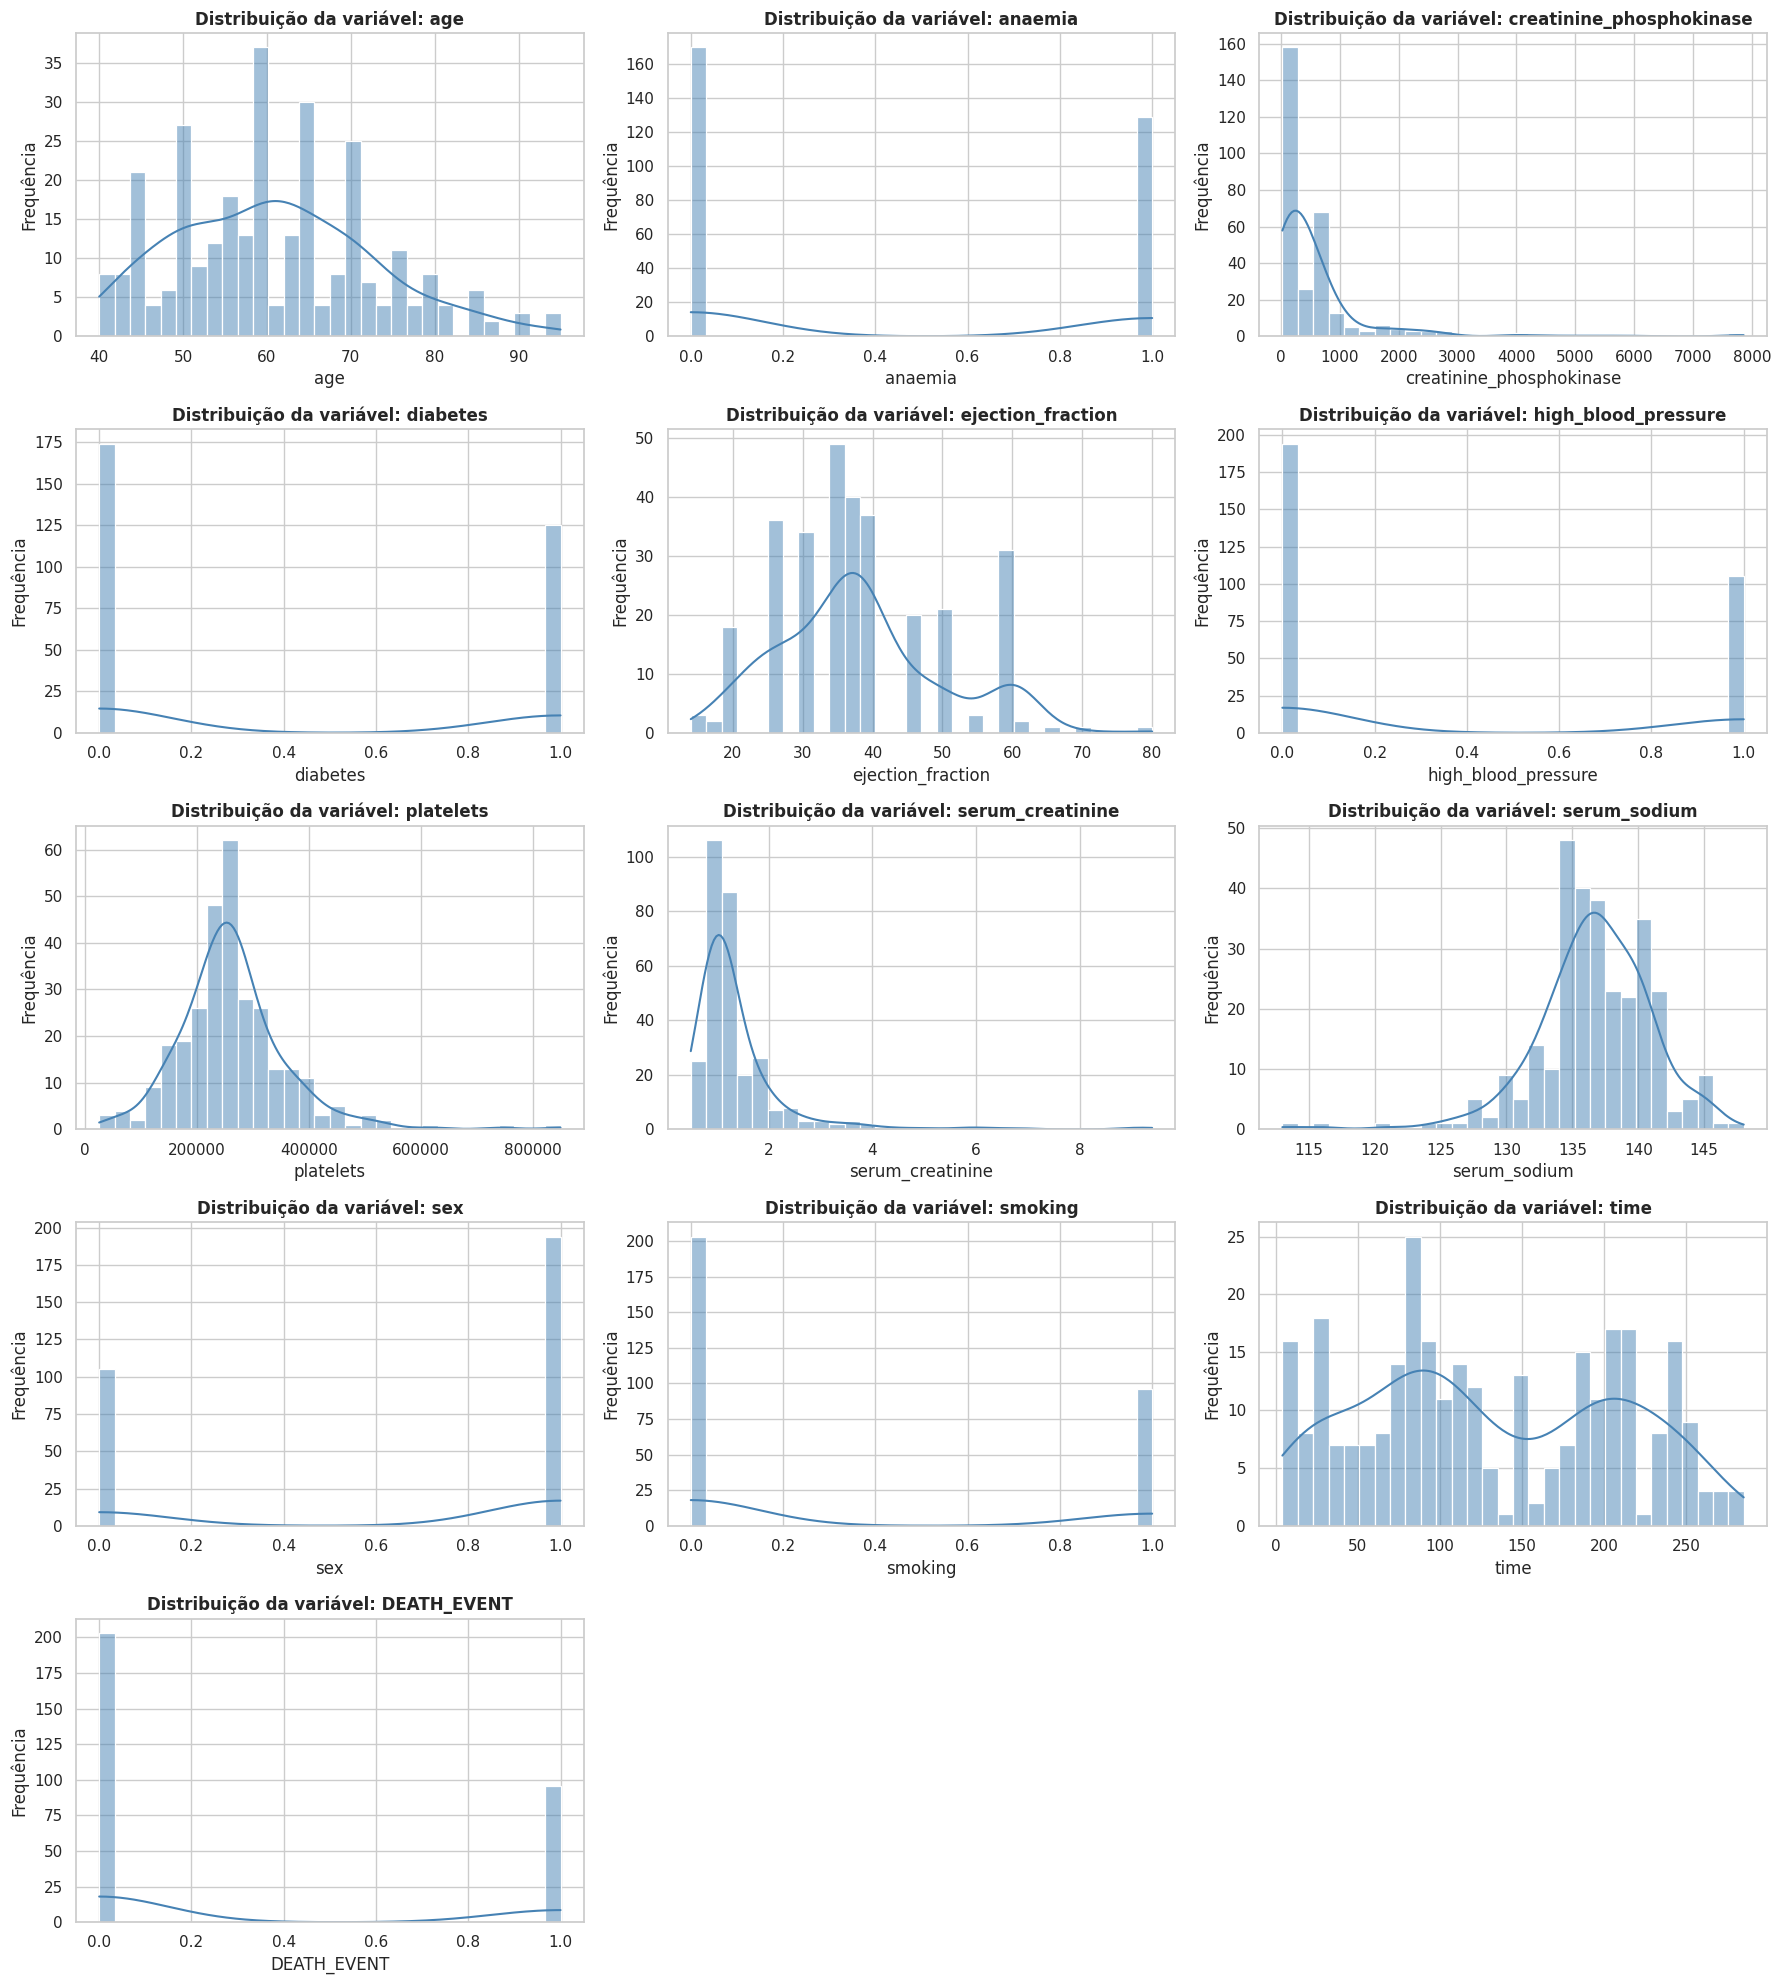

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Filtra apenas atributos numéricos
atributos_numericos = df.select_dtypes(include=['int64', 'float64']).columns

# Define o número de colunas e linhas
n_cols = 3
n_rows = (len(atributos_numericos) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

# Loop para gerar cada gráfico no subplot
for i, col in enumerate(atributos_numericos):
    sns.histplot(data=df, x=col, kde=True, bins=30, color='steelblue', ax=axes[i])
    axes[i].set_title(f'Distribuição da variável: {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

# Remove espaços vazios se tiverem sobrado
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


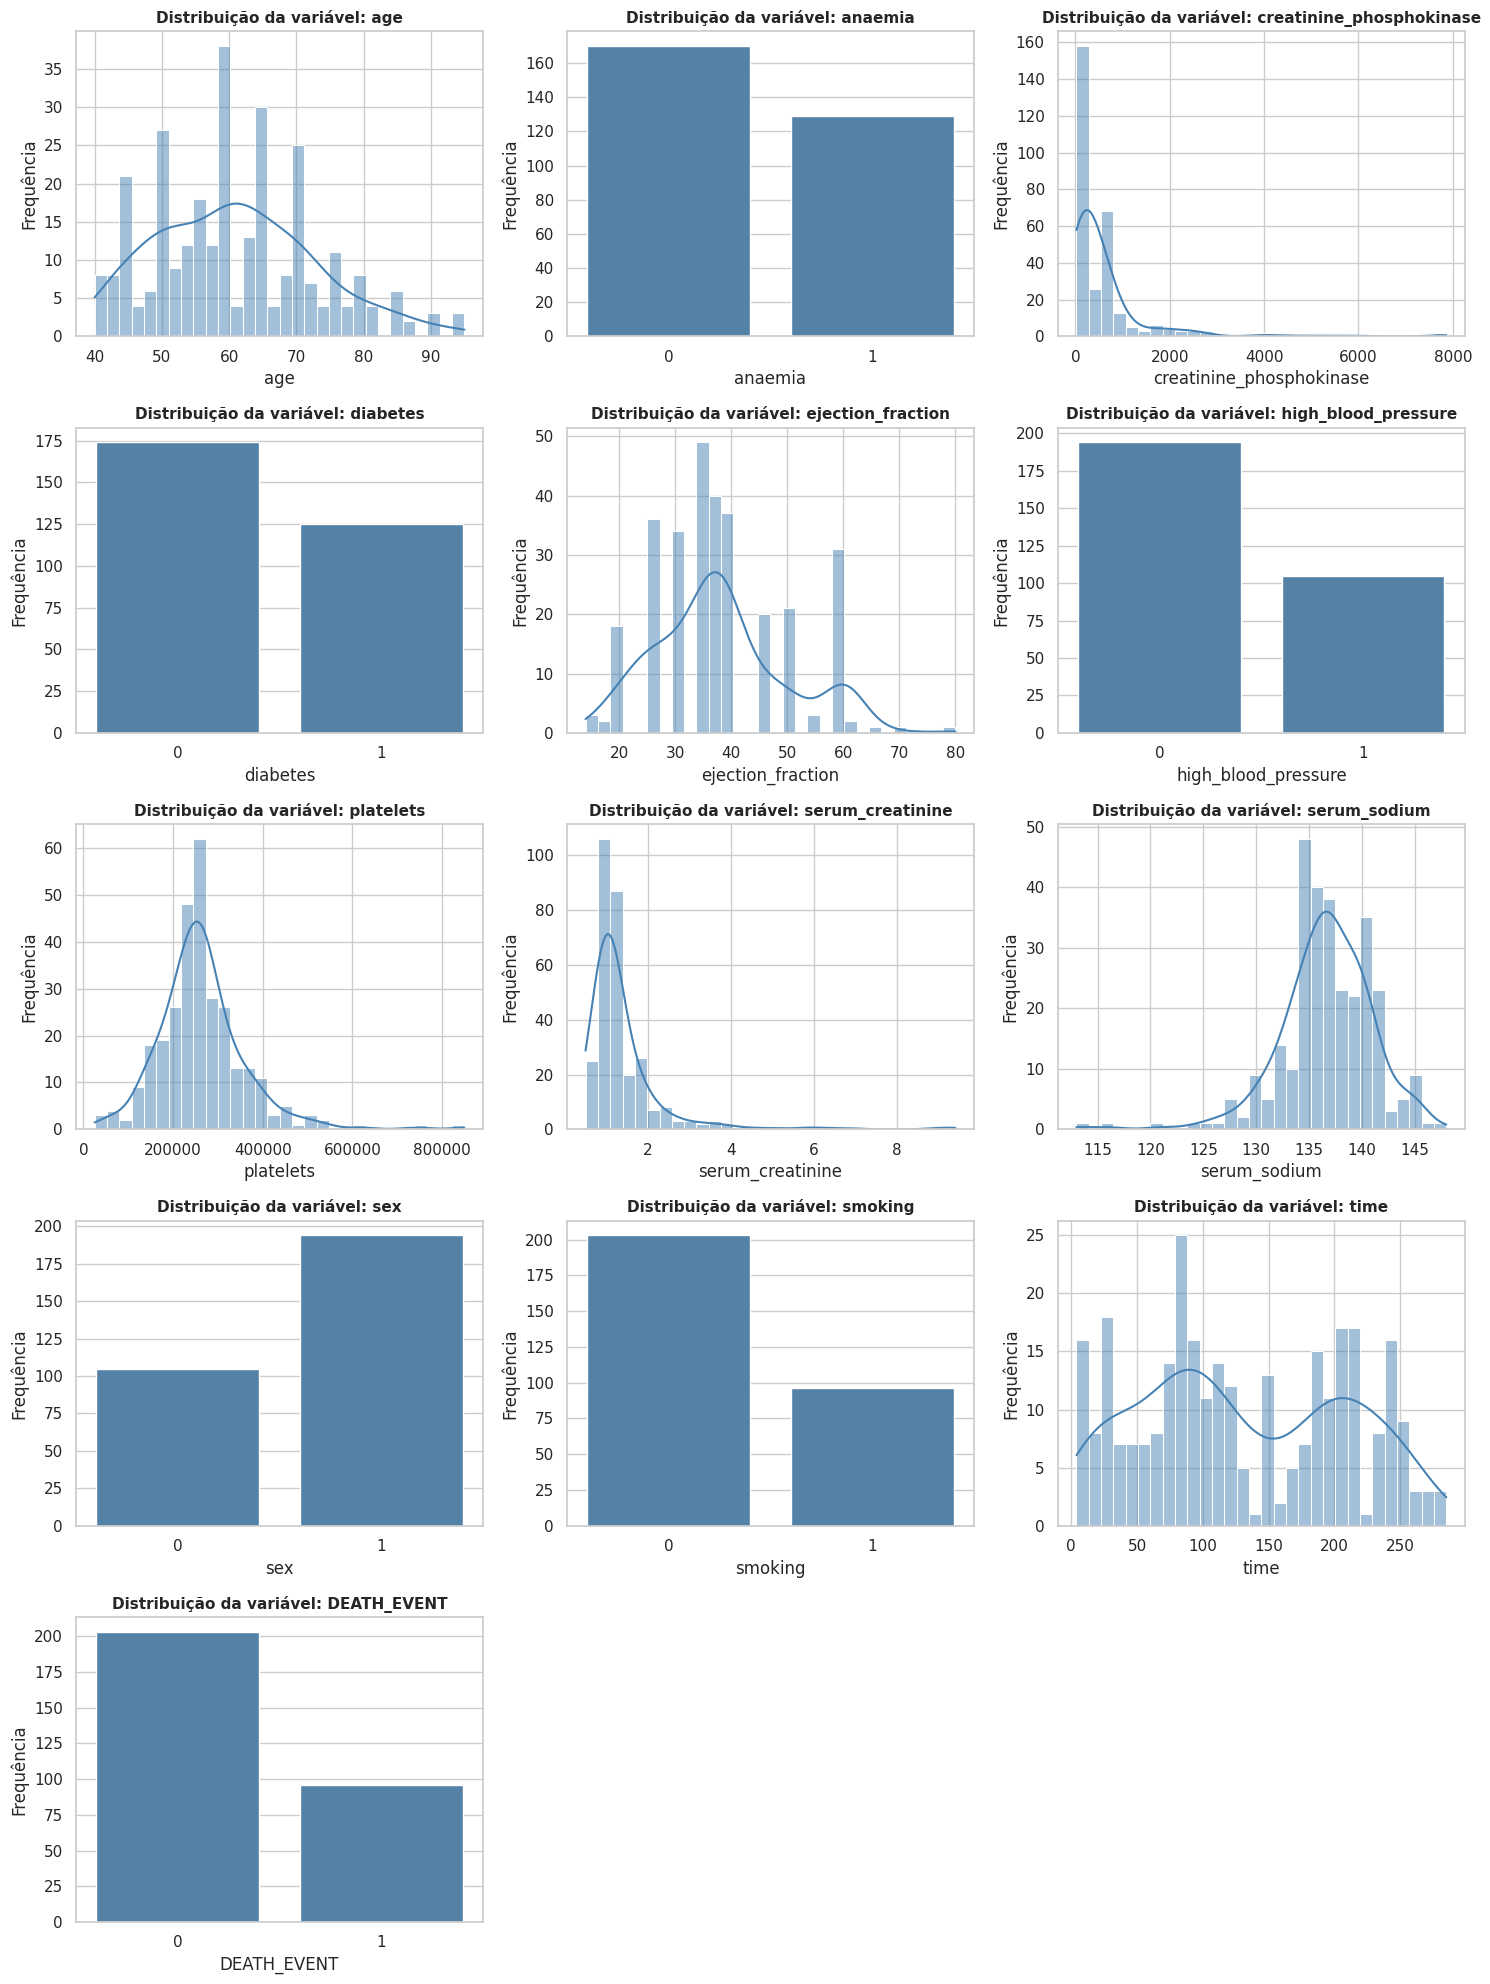

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Recarrega a base e corrige os valores
url = 'https://raw.githubusercontent.com/maurinhopa/mvp-puc-heart-failure/main/Tratado_heart_failure_clinical_records_dataset.csv'
df = pd.read_csv(url, sep=';')
df.loc[185, 'age'] = 65
df.loc[188, 'age'] = 60

# Ajuste visual
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.2f}'.format

# Seleciona atributos numéricos
atributos_numericos = df.select_dtypes(include=['int64', 'float64']).columns

# Define layout de 3 colunas por linha
n_colunas = 3
n_graficos = len(atributos_numericos)
n_linhas = (n_graficos + n_colunas - 1) // n_colunas

fig, axes = plt.subplots(n_linhas, n_colunas, figsize=(15, n_linhas * 4))
axes = axes.flatten()

for i, col in enumerate(atributos_numericos):
    ax = axes[i]

    if df[col].dropna().isin([0, 1]).all() and df[col].nunique() == 2:
        # Variável booleana: gráfico de barras
        sns.countplot(x=col, data=df, ax=ax, color='steelblue')
    else:
        # Variável contínua: histograma com KDE
        sns.histplot(data=df, x=col, kde=True, bins=30, color='steelblue', ax=ax)

    ax.set_title(f'Distribuição da variável: {col}', fontsize=11, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequência')

# Remove subplots vazios (se houver)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


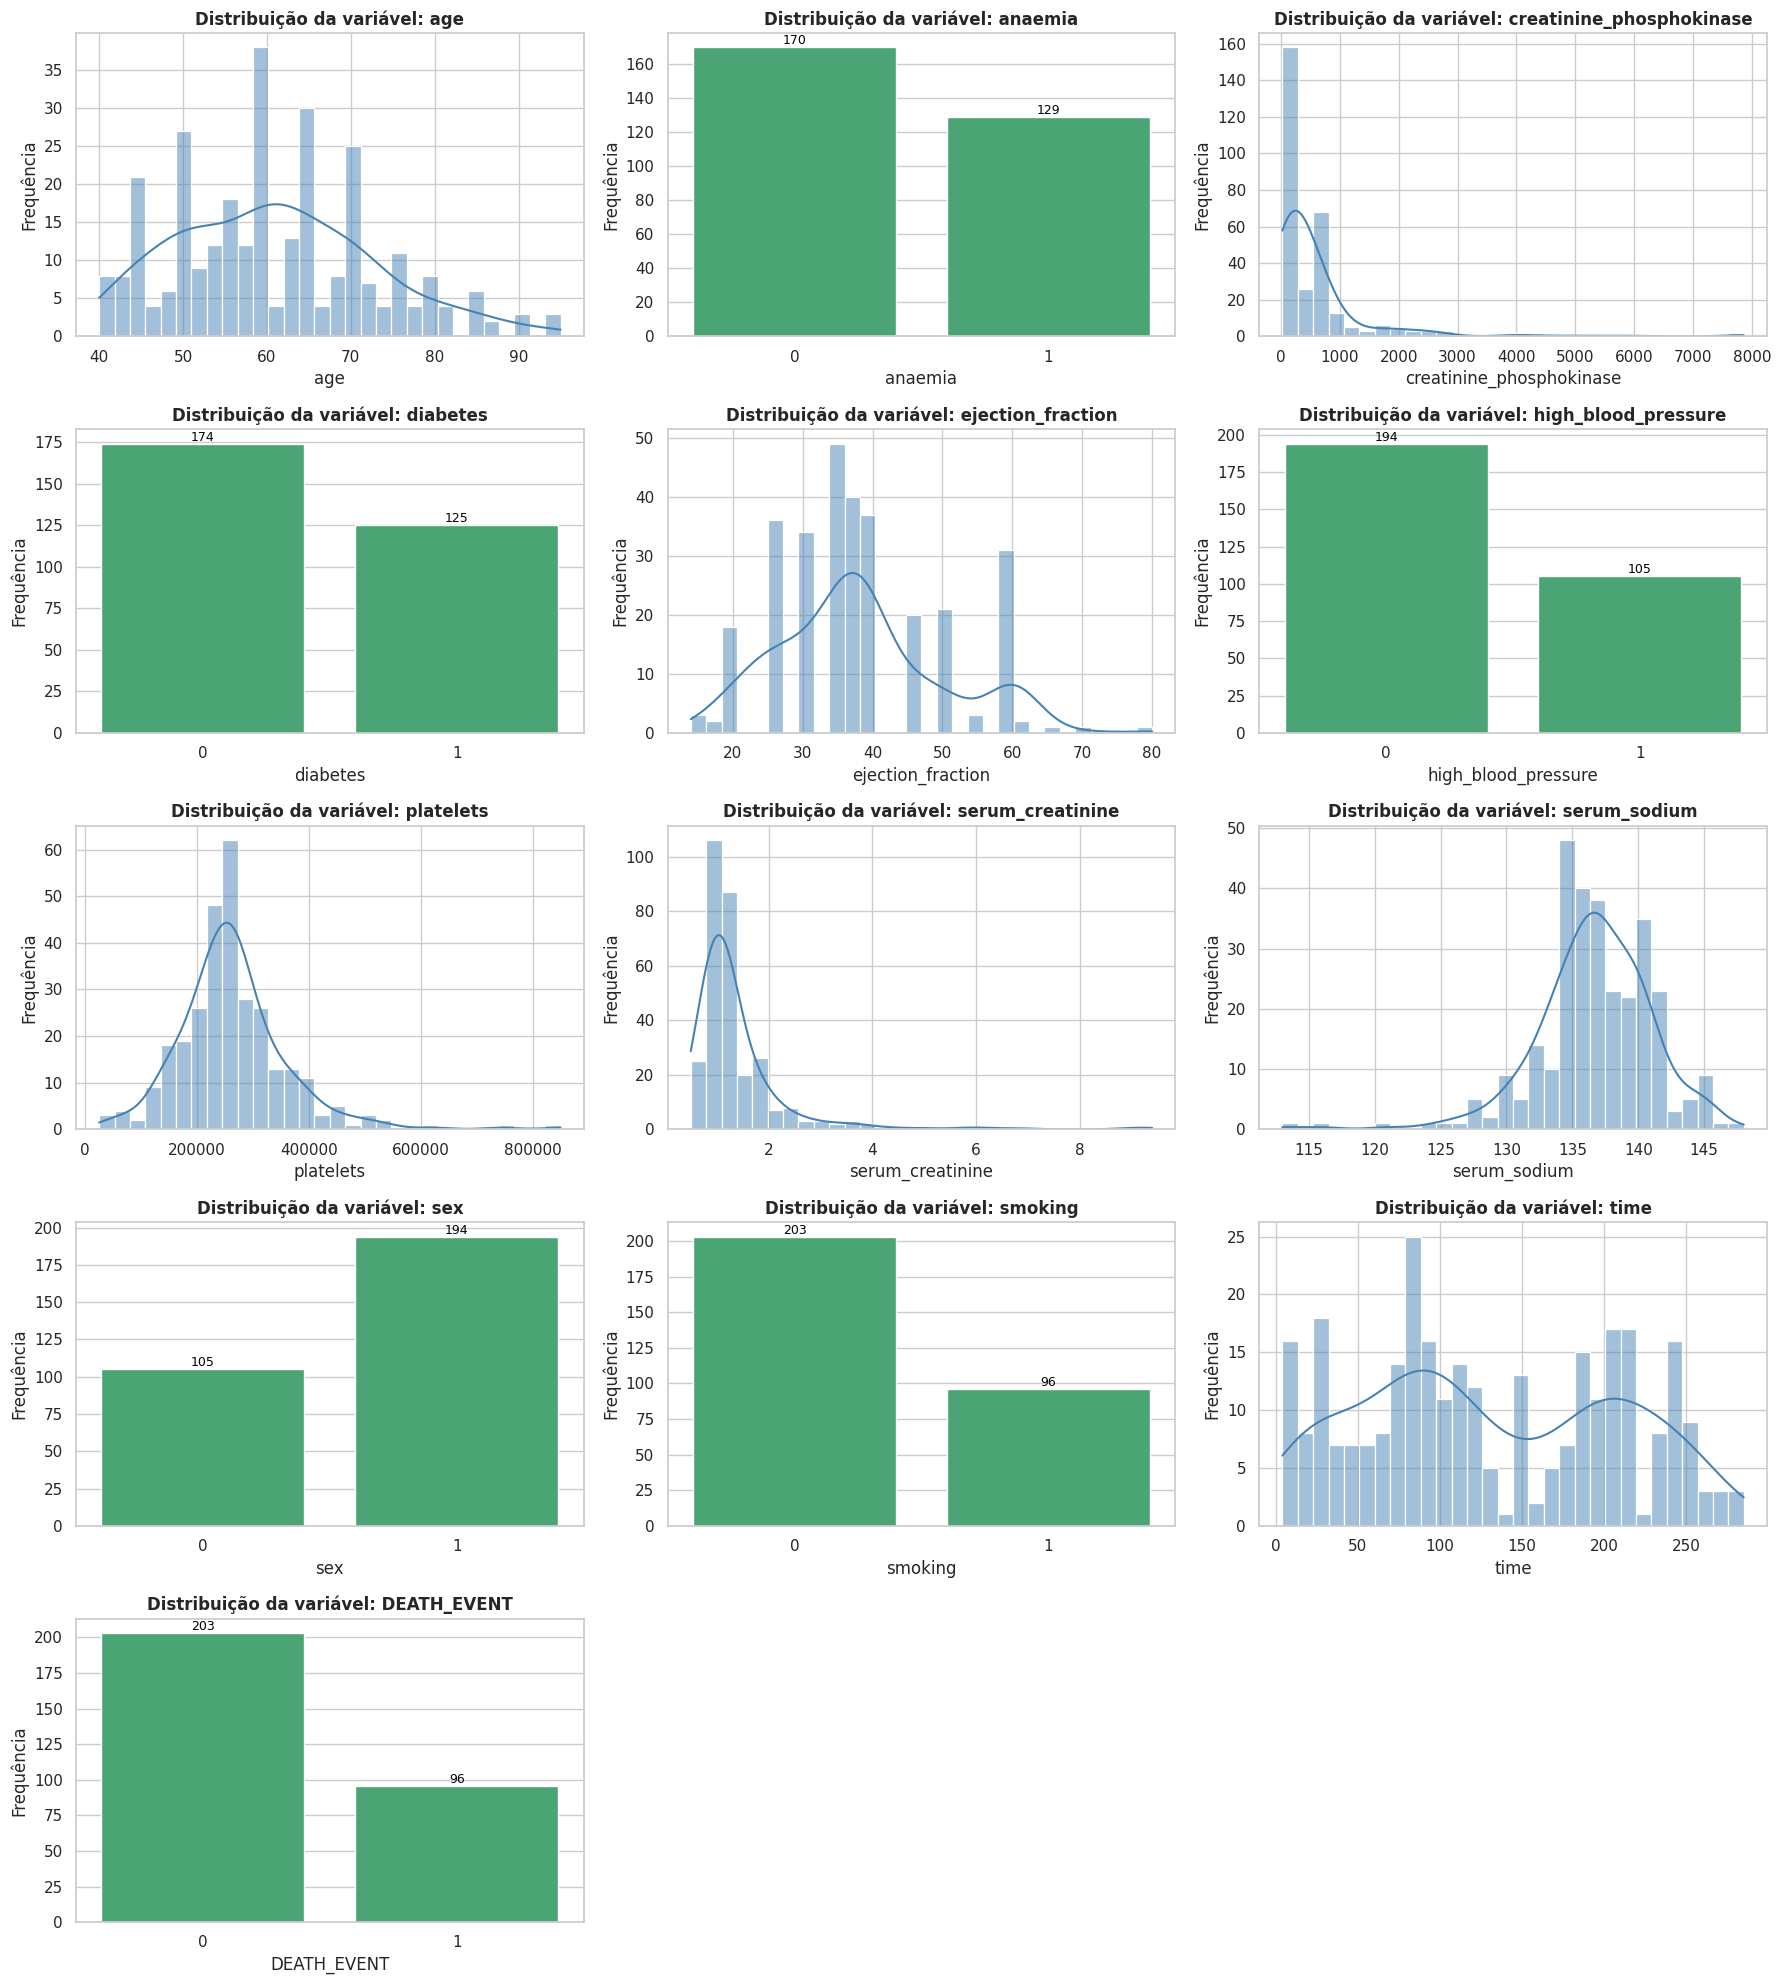

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajuste visual global
sns.set(style="whitegrid")

# Identifica colunas numéricas
atributos_numericos = df.select_dtypes(include=['int64', 'float64']).columns

# Define layout: 3 gráficos por linha
n_colunas = 3
n_linhas = -(-len(atributos_numericos) // n_colunas)  # arredonda pra cima
fig, axs = plt.subplots(n_linhas, n_colunas, figsize=(18, n_linhas * 4))
axs = axs.flatten()

# Gera os gráficos
for i, col in enumerate(atributos_numericos):
    ax = axs[i]

    # Verifica se é uma variável booleana (0/1 apenas)
    if df[col].dropna().isin([0, 1]).all() and df[col].nunique() == 2:
        sns.countplot(x=col, data=df, ax=ax, color='mediumseagreen')
        ax.set_ylabel("Frequência")

        # Adiciona os rótulos de frequência nas barras
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=9, color='black')
    else:
        sns.histplot(data=df, x=col, kde=True, bins=30, color='steelblue', ax=ax)
        ax.set_ylabel("Frequência")

    ax.set_title(f'Distribuição da variável: {col}', fontsize=12, fontweight='bold')

# Remove gráficos vazios (caso o número de atributos não seja múltiplo de 3)
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


## Análise sobre a distribuição dos atributos

Ao observar os gráficos, percebe-se que os atributos binários como sex, anaemia, diabetes, high_blood_pressure, smoking e DEATH_EVENT já estão em formato adequado, representando categorias com valores 0 e 1. Não exigem transformação adicional.

Por outro lado, variáveis como creatinine_phosphokinase, serum_creatinine e platelets apresentam distribuição assimétrica, com valores extremos (outliers), o que pode afetar modelos sensíveis à escala ou à normalidade. Nesses casos, transformações como logaritmo, normalização ou padronização podem ser úteis.

Já variáveis como age, ejection_fraction, serum_sodium e time têm distribuição mais simétrica, mas podem se beneficiar de padronização em modelos baseados em distância.

Portanto, a análise gráfica ajuda a definir estratégias específicas de transformação para cada tipo de variável na preparação dos dados.

## O problema de classificação

O modelo em questão se trata de um problema de Machine Learning supervisionado do tipo classificação binária, cujo objetivo é prever a ocorrência de morte entre pacientes com insuficiência cardíaca. A variável-alvo utilizada para isso é DEATH_EVENT, que assume valor 1 quando o paciente foi a óbito e 0 caso tenha sobrevivido.

Ao analisar a distribuição dessa variável, conforme o gráfico de barras acima exposto,  observa-se que 203 pacientes sobreviveram (classe 0) e 96 foram a óbito (classe 1), o que representa uma proporção aproximada de 68% para 32%. Esse cenário caracteriza um leve desbalanceamento entre as classes, uma vez que a quantidade de exemplos da classe majoritária (sobrevivência) é mais que o dobro da classe minoritária (óbito).

Apesar de não se tratar de um desbalanceamento extremo, é importante considerar que alguns algoritmos de classificação podem ser sensíveis a esse tipo de desequilíbrio, especialmente se a métrica de avaliação principal utilizada for a acurácia. Em situações como essa, um modelo que previsse sistematicamente a classe majoritária (por exemplo, “nenhuma morte”) poderia alcançar uma acurácia de 68%, mesmo sem identificar corretamente nenhum caso de óbito. Isso evidencia a necessidade de utilizar métricas mais apropriadas, como F1-score ou AUC-ROC, que conseguem capturar melhor o desempenho do modelo em relação à classe minoritária — que, neste contexto clínico, é justamente a mais relevante.

Além da escolha adequada das métricas, pode ser necessário aplicar técnicas de balanceamento de classes na etapa de modelagem. Entre as abordagens possíveis estão o oversampling da classe minoritária (como o uso do algoritmo SMOTE), o undersampling da classe majoritária, ou o uso de ponderação de classes nos próprios algoritmos.

Por fim, vale destacar que os autores do estudo original não reportaram problemas significativos causados pelo desbalanceamento observado. Isso provavelmente se deve ao uso de algoritmos robustos e à escolha de métricas adequadas. No entanto, é fundamental que esse ponto seja levado em consideração ao construir novos modelos ou ao aplicar esse dataset em outros contextos.

# Análise de atributos através da utilização de gráficos

Nesta etapa, utilizamos boxplots para analisar a relação entre cada variável numérica e o desfecho de interesse (DEATH_EVENT).
Essa escolha se justifica porque o boxplot permite:

Comparar distribuições entre dois grupos (pacientes que morreram e que sobreviveram),

Visualizar diferenças de mediana, dispersão e outliers,

Identificar variáveis com potencial preditivo relevante para o modelo.

Esse tipo de visualização é especialmente útil para destacar tendências distintas entre as classes, servindo como apoio no entendimento das variáveis do modelo.

O detalhamento será abordado a seguir:


/tmp/ipython-input-14-1630921410.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='DEATH_EVENT', y=var, ax=axes[i], palette='Set2')
/tmp/ipython-input-14-1630921410.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='DEATH_EVENT', y=var, ax=axes[i], palette='Set2')
/tmp/ipython-input-14-1630921410.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='DEATH_EVENT', y=var, ax=axes[i], palette='Set2')
/tmp/ipython-input-14-1630921410.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is depr

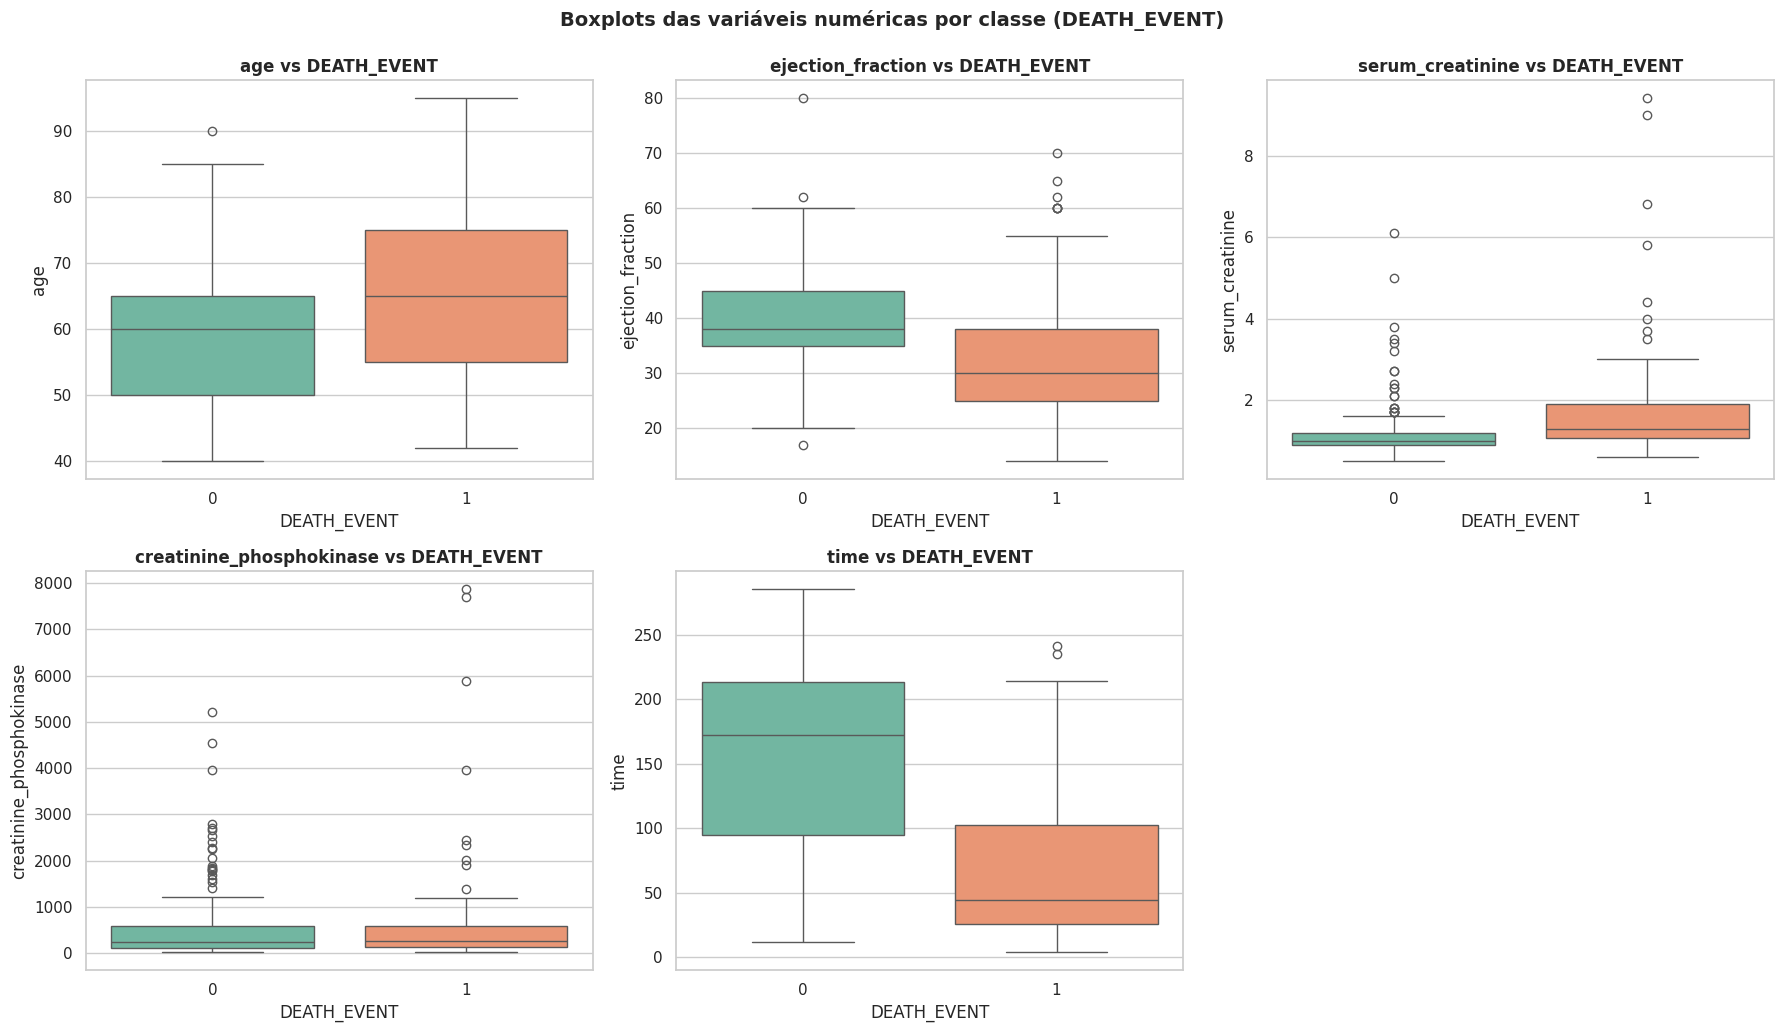

In [14]:
# Verifica se df já está carregado
if 'df' not in globals():
    import pandas as pd
    url = 'https://raw.githubusercontent.com/maurinhopa/mvp-puc-heart-failure/main/Tratado_heart_failure_clinical_records_dataset.csv'
    df = pd.read_csv(url, sep=';')
    df.loc[185, 'age'] = 65
    df.loc[188, 'age'] = 60

import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual
sns.set(style="whitegrid")

# Variáveis numéricas principais
variaveis_numericas = ['age', 'ejection_fraction', 'serum_creatinine',
                       'creatinine_phosphokinase', 'time']

# Criar grid de gráficos
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Gerar um boxplot para cada variável
for i, var in enumerate(variaveis_numericas):
    sns.boxplot(data=df, x='DEATH_EVENT', y=var, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{var} vs DEATH_EVENT', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('DEATH_EVENT')
    axes[i].set_ylabel(var)

# Remove espaço vazio se sobrar
if len(variaveis_numericas) < len(axes):
    fig.delaxes(axes[-1])

# Título geral e ajustes
plt.tight_layout()
plt.suptitle('Boxplots das variáveis numéricas por classe (DEATH_EVENT)', fontsize=14, fontweight='bold', y=1.03)
plt.show()


## Resultados - Overview

A análise exploratória por meio de boxplots mostra que variáveis como idade, fração de ejeção, creatinina sérica e tempo de acompanhamento apresentam diferenças significativas entre os grupos de óbito e sobrevivência. Isso indica que essas variáveis podem ter papel preditivo relevante na construção do modelo de Machine Learning. Algumas variáveis, como creatinine_phosphokinase, apresentam muitos outliers e uma separação menos clara, podendo demandar transformações ou análise complementar.
### Detalhamento

**1. age vs DEATH_EVENT**

Idade média dos mortos (classe 1) é maior que a dos vivos (classe 0).

Isso reforça que a idade é um fator relevante para risco de morte por insuficiência cardíaca.

Os dois grupos têm outliers, mas o padrão geral é claro: quanto mais velho, maior o risco.

**2. ejection_fraction vs DEATH_EVENT**

O grupo que morreu tem uma fração de ejeção menor.

Isso bate com a literatura: fração de ejeção baixa = coração está bombeando mal.

Variável bem importante, parece discriminativa para o modelo.

**3. serum_creatinine vs DEATH_EVENT**

Os que morreram têm níveis ligeiramente mais altos de creatinina sérica.

É um marcador de função renal — e função renal ruim aumenta risco cardíaco.

Muitos outliers no grupo de mortos, o que indica possível instabilidade clínica.

**4. creatinine_phosphokinase vs DEATH_EVENT**

Essa variável tem muitos outliers, dos dois lados.

Não parece ter uma separação tão clara entre vivos e mortos.

Pode ter importância, mas é menos óbvia — precisaria de análise complementar ou normalização.

**5. time vs DEATH_EVENT**

O tempo que o paciente ficou em observação é claramente maior entre os que sobreviveram.

Os que morreram geralmente morreram mais cedo.

Forte potencial preditivo — mas cuidado: é uma variável que pode "olhar pro futuro", dependendo da lógica do modelo.

### Sobre a Variável [AGE]

Embora a variável age apresente uma clara diferença entre os grupos de óbito e sobrevivência, os autores do estudo original observaram que sua exclusão resultava em modelos com desempenho superior. Isso pode estar relacionado a colinearidade/redundância de informação, overfitting, ou ainda ao viés da amostra. Portanto, mesmo sendo preditiva, age pode ter reduzido a capacidade do modelo de generalizar, impactando negativamente métricas como F1-score. Dessa forma, mesmo atributos com forte correlação aparente podem ser removidos estrategicamente para melhorar a generalização do modelo.


# Continuação - Análise sobre os atributos booleanos

Para os atributos booleanos, optamos por uma visualização baseada em gráficos de barras empilhadas com rótulos percentuais. Essa abordagem permite observar, para cada valor da variável (ex: presença ou ausência de anemia), a proporção de pacientes que sobreviveram ou morreram (DEATH_EVENT).

Essa visualização é especialmente útil em problemas de classificação binária, pois revela indícios de associação entre os atributos e o desfecho. A comparação das proporções entre as classes fornece sinais sobre o possível impacto de cada variável na mortalidade.

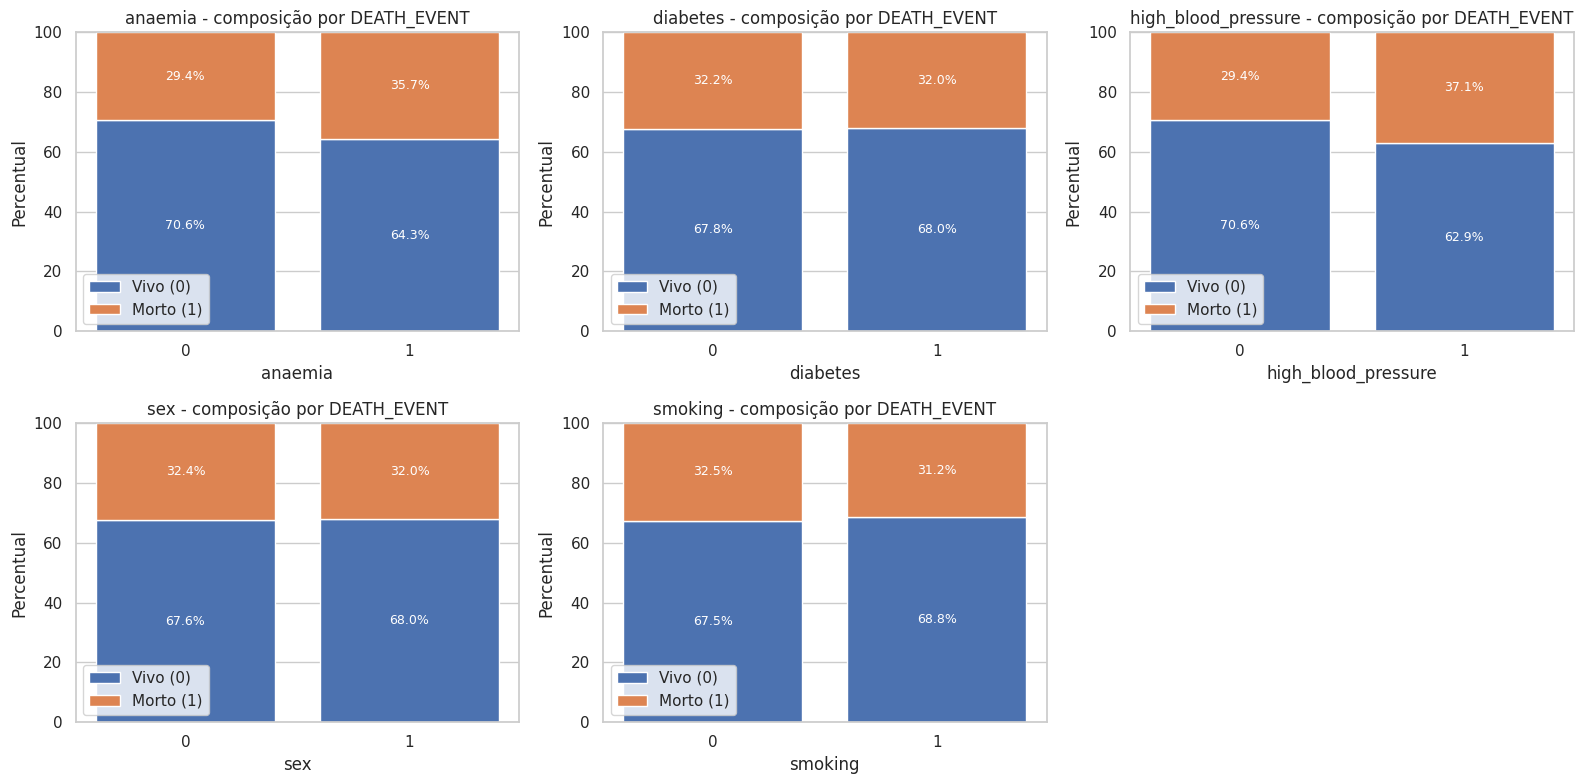

In [15]:
import matplotlib.pyplot as plt

# Lista de variáveis booleanas
variaveis_booleanas = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

# Cria gráfico de barras empilhadas com percentual para cada variável booleana
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
axes = axes.flatten()

for i, var in enumerate(variaveis_booleanas):
    # Calcula percentual de vivos e mortos para cada valor da variável (0 ou 1)
    percentual = df.groupby([var, 'DEATH_EVENT']).size().unstack().fillna(0)
    percentual = percentual.div(percentual.sum(axis=1), axis=0) * 100

    # Plota gráfico de barra empilhada
    ax = axes[i]
    bottom = [0] * len(percentual)
    for death_event in [0, 1]:
        label = 'Vivo (0)' if death_event == 0 else 'Morto (1)'
        heights = percentual[death_event]
        ax.bar(percentual.index.astype(str), heights, bottom=bottom, label=label)

        # Rótulos com os valores em cima das barras
        for j, val in enumerate(heights):
            ax.text(j, bottom[j] + val / 2, f'{val:.1f}%', ha='center', va='center', color='white', fontsize=9)
            bottom[j] += val

    ax.set_title(f'{var} - composição por DEATH_EVENT')
    ax.set_xlabel(var)
    ax.set_ylabel('Percentual')
    ax.set_ylim(0, 100)
    ax.legend()

# Remove gráfico vazio se número de gráficos for ímpar
if len(variaveis_booleanas) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


# Resultado sobre os atributos booleanos analisados

Interpretação de cada variável:

**1. anaemia**

Mortes: 35,7% com anemia vs 29,4% sem.

Possível risco levemente aumentado com anemia.

**2. diabetes**

Praticamente nenhuma diferença entre os grupos (32,2% vs 32,0%).

Não parece relevante isoladamente.

**3. high_blood_pressure**

Mortes: 37,1% com pressão alta vs 29,4% sem.

Pode ter influência significativa no desfecho.

**4. sex**

Homens (1) e mulheres (0) têm taxas bem próximas (32% vs 32,4%).

Pouca diferença, mas precisa de testes estatísticos para cravar.

**5. smoking**

Mortes: 31,2% fumantes vs 32,5% não fumantes.

Contraintuitivo — fumantes morreram proporcionalmente menos.

Pode estar correlacionado com outra variável (ex: idade menor entre fumantes).

A análise dos gráficos revela que, em alguns atributos booleanos, há variações discretas nas proporções de óbitos entre os grupos:

Pacientes com pressão alta (high_blood_pressure = 1) tiveram maior proporção de morte (37,1%) do que os sem pressão alta (29,4%).

Entre os pacientes com anemia, a taxa de óbito também foi ligeiramente superior (35,7% contra 29,4%).

Para diabetes, sexo e tabagismo, as diferenças entre as classes foram pequenas, sugerindo baixa capacidade discriminativa isolada.

Esses padrões sugerem que algumas variáveis podem ter papel preditivo modesto, enquanto outras, como high_blood_pressure, merecem atenção. Ainda assim, é importante ressaltar que relações isoladas não garantem causalidade — a análise combinada (com modelos) será mais conclusiva.



# Continuação = Análise por Heatmap

Após a análise individual de cada atributo, realizamos agora uma análise combinada por meio de um heatmap de correlação de Pearson.

O objetivo é identificar possíveis relações lineares entre as variáveis — especialmente entre os atributos preditores e a variável-alvo DEATH_EVENT.

Essa etapa é fundamental por dois motivos:

Permite observar possíveis redundâncias entre variáveis (alta correlação entre preditores).

Indica quais variáveis têm maior correlação com a variável-alvo, o que pode ajudar na seleção de atributos relevantes para o modelo.

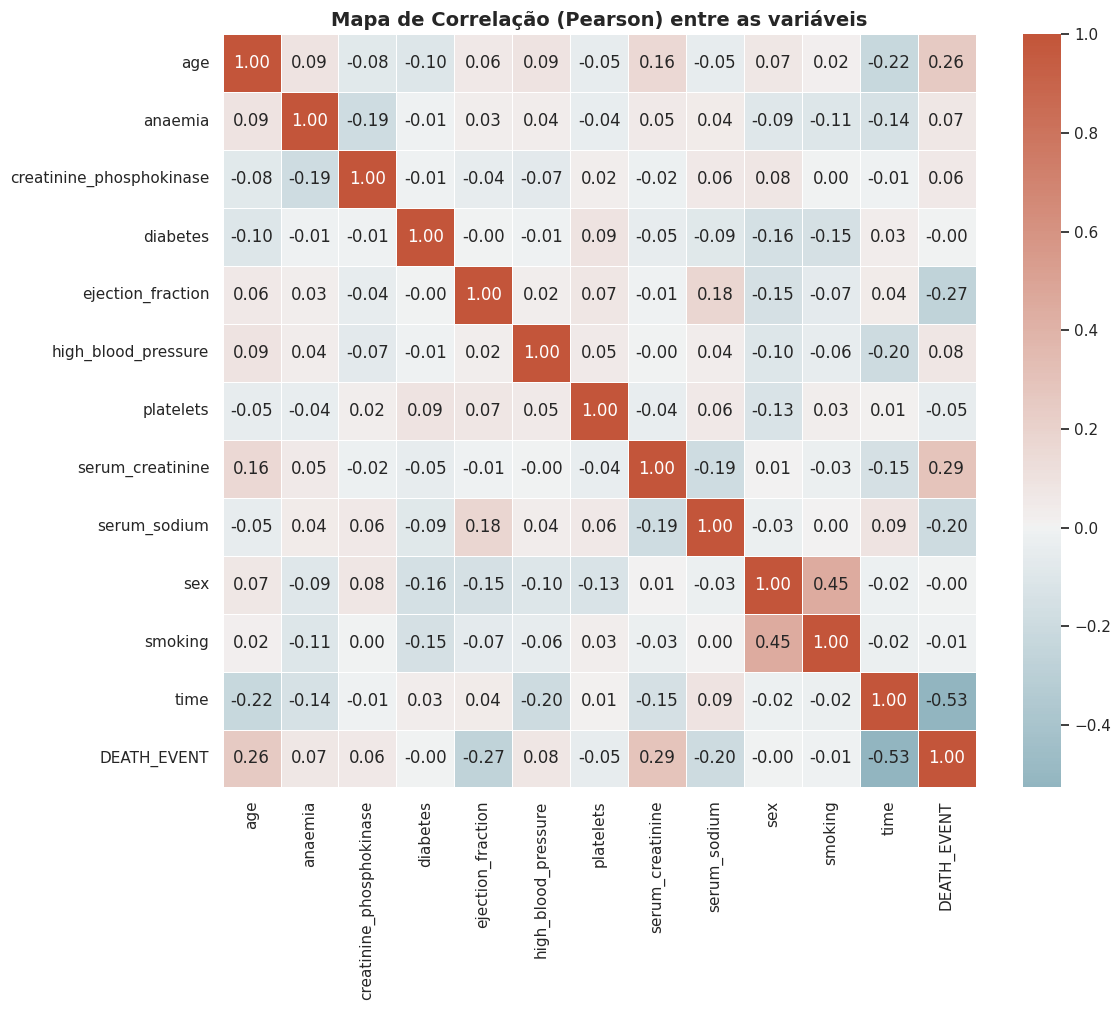

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula a matriz de correlação de Pearson
corr = df.corr(method='pearson')

# Define uma paleta de cores personalizada
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Define o tamanho da figura
plt.figure(figsize=(12, 10))

# Plota o heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap=cmap, center=0, linewidths=0.5, square=True)

plt.title('Mapa de Correlação (Pearson) entre as variáveis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


ei seus merdinhas